In [13]:
import os
import tarfile
import zipfile
import urllib

DOWNLOAD_ROOT = "https://www.nhtsa.gov/filebrowser/download/176791"
FARS_PATH = os.path.join("datasets","2018")
FARS_URL = DOWNLOAD_ROOT

def fetch_FARS_data(fars_url=FARS_URL, fars_path=FARS_PATH):
    print(fars_path)
    os.makedirs(fars_path, exist_ok=True)
    tgz_path = os.path.join(fars_path,"FARS2018NationalCSV.zip")
    urllib.request.urlretrieve(FARS_URL, tgz_path)
    h_tgz = zipfile.ZipFile(tgz_path)
    h_tgz.extractall(path=fars_path)
    h_tgz.close()

In [14]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
fetch_FARS_data()

datasets/2018


In [15]:
import pandas as pd

def load_data(fars_path=FARS_PATH, filename='ACCIDENT.csv'):
    csv_path = os.path.join(fars_path, filename)
    print(csv_path)
    return pd.read_csv(csv_path)

In [16]:
d = load_data()
d.head()

datasets/2018/ACCIDENT.csv


,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [17]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       33654 non-null  int64  
 1   ST_CASE     33654 non-null  int64  
 2   VE_TOTAL    33654 non-null  int64  
 3   VE_FORMS    33654 non-null  int64  
 4   PVH_INVL    33654 non-null  int64  
 5   PEDS        33654 non-null  int64  
 6   PERNOTMVIT  33654 non-null  int64  
 7   PERMVIT     33654 non-null  int64  
 8   PERSONS     33654 non-null  int64  
 9   COUNTY      33654 non-null  int64  
 10  CITY        33654 non-null  int64  
 11  DAY         33654 non-null  int64  
 12  MONTH       33654 non-null  int64  
 13  YEAR        33654 non-null  int64  
 14  DAY_WEEK    33654 non-null  int64  
 15  HOUR        33654 non-null  int64  
 16  MINUTE      33654 non-null  int64  
 17  NHS         33654 non-null  int64  
 18  RUR_URB     33654 non-null  int64  
 19  FUNC_SYS    33654 non-nul

In [18]:
d["RAIL"].value_counts()

0000000    33526
9999999        3
716320A        1
642347G        1
673872X        1
           ...  
920225U        1
608311K        1
507894U        1
816690K        1
079153A        1
Name: RAIL, Length: 127, dtype: int64

In [19]:
d.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,...,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000
mean,27.221727,272959.565074,1.580258,1.541332,0.038926,0.231830,0.243359,2.241517,2.253046,91.763238,...,67.332442,59.749510,67.141915,73.812979,77.751798,2.151958,1.069204,0.957717,1.086349,0.256849
std,16.397000,163875.616648,0.823660,0.776784,0.302969,0.476945,0.506895,1.804314,1.809363,97.588969,...,36.303949,42.862942,36.368152,35.317922,29.735309,10.610611,9.760143,9.647763,0.359572,0.454830
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,121958.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,...,33.000000,15.000000,33.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,260901.500000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,71.000000,...,98.000000,99.000000,98.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,420571.750000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,115.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,56.000000,560101.000000,27.000000,27.000000,20.000000,10.000000,10.000000,47.000000,47.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,20.000000,4.000000


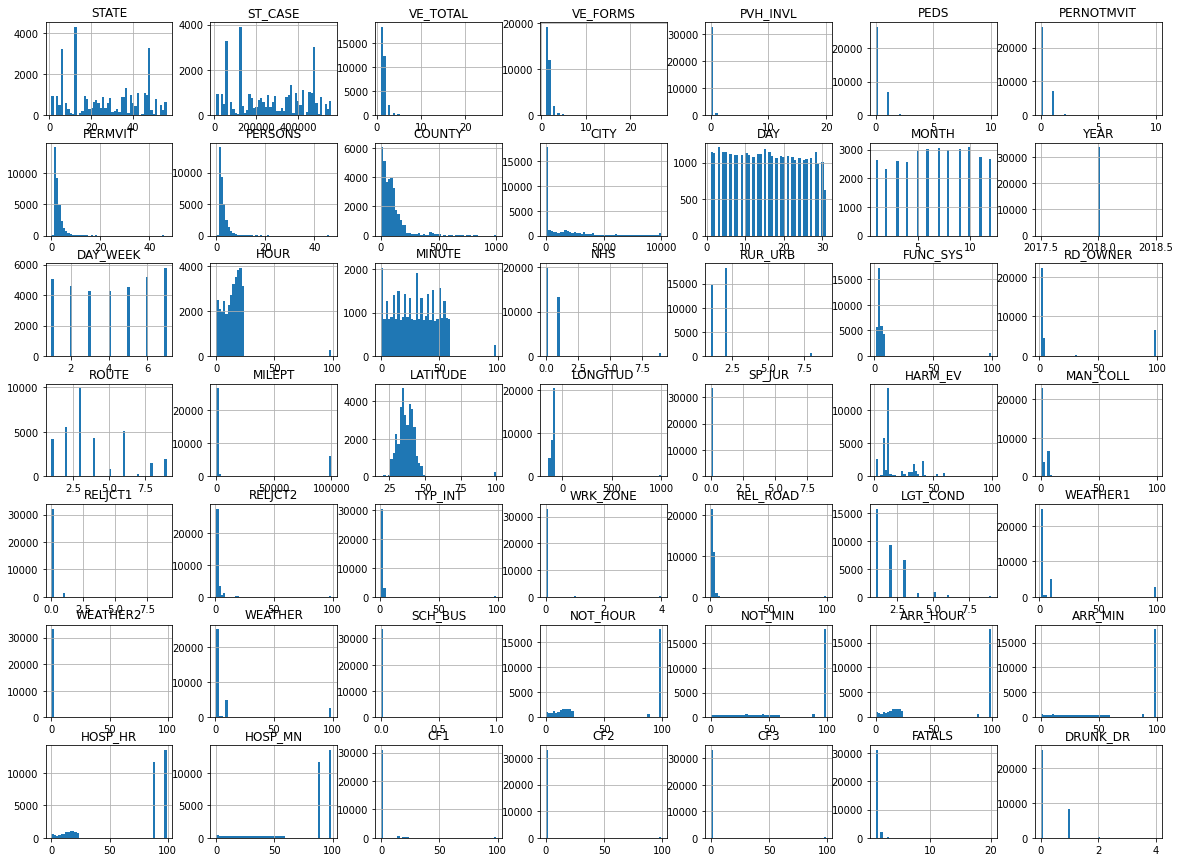

In [20]:
import matplotlib.pyplot as plt

d.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='LONGITUD', ylabel='LATITUDE'>

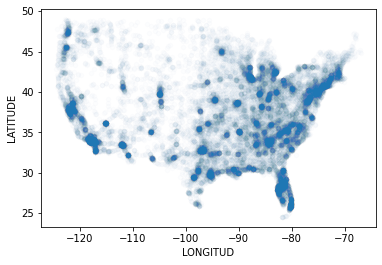

In [21]:
d1=d[d["LONGITUD"]<0]
d2=d1[d1["LONGITUD"]>(-130)]
d2.plot(kind='scatter', x='LONGITUD', y='LATITUDE', alpha=0.01)

<AxesSubplot:>

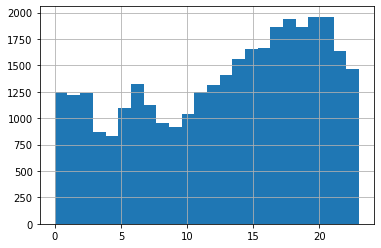

In [25]:
d1=d[d["HOUR"]<25]
d1["HOUR"].hist(bins=24)

In [26]:
d = load_data(filename='ACC_AUX.csv')
d.head()

datasets/2018/ACC_AUX.csv


,YEAR,STATE,ST_CASE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_D65PLS,A_D21_24,A_D16_24,A_RD,A_HR,A_DIST,A_DROWSY,BIA,SPJ_INDIAN,INDIAN_RES
0,2018,1,10001,121,1,1,4,1,1,2,...,2,2,2,1,2,2,2,0,0,0
1,2018,1,10002,127,2,1,4,2,1,3,...,2,1,1,1,2,2,2,0,0,0
2,2018,1,10003,21,1,1,4,1,1,4,...,2,2,2,1,2,2,2,0,0,0
3,2018,1,10004,3,1,1,4,1,1,4,...,2,2,2,1,2,2,2,0,0,0
4,2018,1,10005,73,1,1,4,2,1,1,...,2,2,2,2,2,2,2,0,0,0


In [27]:
d['A_WEATHER'].value_counts()

1     22263
13     4896
99     2761
2      2755
4       391
6       364
3        64
10       53
12       40
14       32
15       25
11       10
Name: A_WEATHER, dtype: int64

In [28]:
d = load_data(filename='PERSON.csv')
d.head()

datasets/2018/PERSON.csv


,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,121,5,1,6,...,600,0,0,0,0,0,1,7,2,0
1,1,10002,1,1,1,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
2,1,10002,1,1,2,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
3,1,10003,2,1,1,0,21,8,1,22,...,2250,0,0,0,0,0,0,7,1,0
4,1,10003,2,2,1,0,21,8,1,22,...,8888,999,99,0,0,0,8,0,0,0


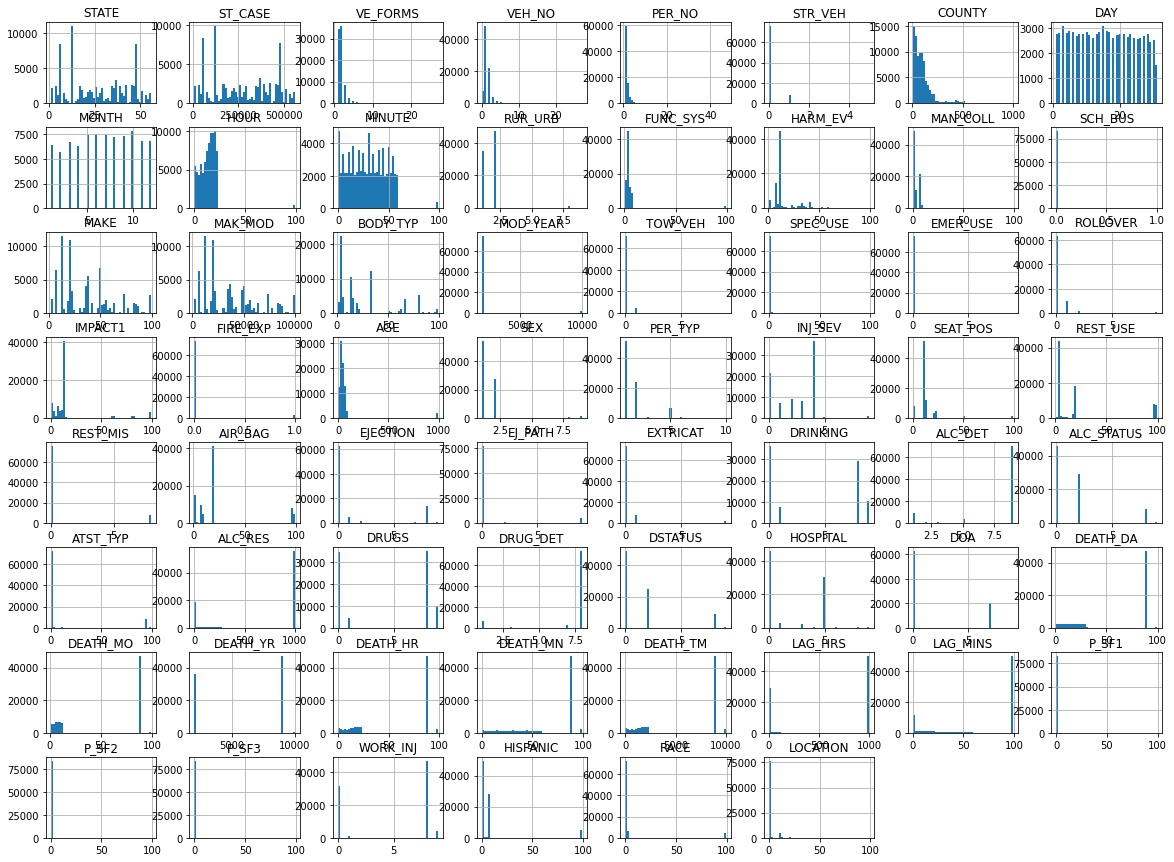

In [29]:
d.hist(bins=50, figsize=(20,15))
plt.show()